In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
# Load DataSet into DataFrame
df1 = pd.read_csv("DataSet.csv")

In [3]:
# Remove 'Country Name' and 'Series Name' from the DataFrame
df2 = df1.drop(['Country Name', 'Series Name'], axis = 'columns')

In [4]:
# Function to Remove Null Values
def is_valid(x):
    try:
        return float(x)
    except:
        return None

In [5]:
# Remove All Null Values
df2['1996'] = df2['1996'].apply(is_valid)
df2['1997'] = df2['1997'].apply(is_valid)
df2['1998'] = df2['1998'].apply(is_valid)
df2['1999'] = df2['1999'].apply(is_valid)
df2['2000'] = df2['2000'].apply(is_valid)
df2['2001'] = df2['2001'].apply(is_valid)
df2['2002'] = df2['2002'].apply(is_valid)
df2['2003'] = df2['2003'].apply(is_valid)
df2['2004'] = df2['2004'].apply(is_valid)
df2['2005'] = df2['2005'].apply(is_valid)
df2['2006'] = df2['2006'].apply(is_valid)
df2['2007'] = df2['2007'].apply(is_valid)
df2['2008'] = df2['2008'].apply(is_valid)
df2['2009'] = df2['2009'].apply(is_valid)
df2['2010'] = df2['2010'].apply(is_valid)
df2['2011'] = df2['2011'].apply(is_valid)
df2['2012'] = df2['2012'].apply(is_valid)
df2['2013'] = df2['2013'].apply(is_valid)
df2['2014'] = df2['2014'].apply(is_valid)
df2['2015'] = df2['2015'].apply(is_valid)
df2['2016'] = df2['2016'].apply(is_valid)
df2['2017'] = df2['2017'].apply(is_valid)
df2['2018'] = df2['2018'].apply(is_valid)

In [6]:
# Function to Put Data In Correct Format for 1 Year Analysis of 2 Features
def single_year_comp(df, year, scode1, scode2):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Series Code'):
        if (subdf['Series Code'].iloc[0] == scode1) or (subdf['Series Code'].iloc[0] == scode2):
            xdf = subdf[['Country Code', 'Series Code', year]]
            df_out = pd.concat([df_out, xdf], ignore_index = True)
    
    df_out = df_out.pivot(index = 'Country Code', columns = 'Series Code', values = year)
    df_out = df_out.dropna()
    
    return df_out

In [7]:
# Function to Put Data in Correct Format for 1 Country Analysis of 2 Features
years_arr = ['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

def single_country_comp(df, country, scode1, scode2):
    year_dict = { 'Year': [], 'Series Code': [], 'Value': [] }
    for key, subdf in df.groupby('Series Code'):
        if (key == scode1) or (key == scode2):
            for index, value in subdf['Country Code'].items():
                if (value == country):
                    for year in years_arr:
                        year_dict['Year'].append(year)
                        year_dict['Series Code'].append(key)
                        year_dict['Value'].append(subdf[year].loc[index])
                
    df_out = pd.DataFrame.from_dict(year_dict)             
    df_out = df_out.pivot(index = 'Year', columns = 'Series Code')
    df_out = df_out.dropna()
    
    return df_out

In [8]:
# Function for Outlier Removal
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [9]:
# Function for 1 Year Correlation Scatter Plot
def create_scatter_plot(df, scode1, scode2):
    x = df[df.columns[0]]
    y = df[df.columns[1]]
    
    outlier_detect(df)
    sns.regplot(x=x, y=y)
    # plt.scatter(x, y, color = 'green')
    plt.xlabel(scode2)
    plt.ylabel(scode1)

In [10]:
# Function for 1 Year Correlation Scatter Plot for 1 Country
def create_scatter_plot_one_country(df, scode1, scode2):
    x = df[df.columns[0]]
    y = df[df.columns[1]]
    
    outlier_detect(df)
    
    plt.scatter(x, y, color = 'green')
    plt.xlabel(scode2)
    plt.ylabel(scode1)

In [11]:
# Function for Finding Correlation Coefficient
def corr_coef(df):
    col_1 = df[df.columns[0]]
    col_2 = df[df.columns[1]]
    correlation = col_1.corr(col_2)
    return "{:.4f}".format(correlation)

In [12]:
# Full Test Case (PPP GDP per Unit Energy vs Total Greenhouse Gas Emissions in the Year 2005)
def find_correlation_1_year(df, year, scode1, scode2):    
    df_out = single_year_comp(df, year, scode1, scode2)
    create_scatter_plot(df_out, scode1, scode2)
    corr_coef(df_out)
    print(corr_coef(df_out))

In [13]:
# Full Test Case for Country
def find_correlation_country_over_years(df, country, scode1, scode2):
    df_out = single_country_comp(df, country, scode1, scode2)
    create_scatter_plot(df_out, scode1, scode2)
    print(corr_coef(df_out))

-0.3492


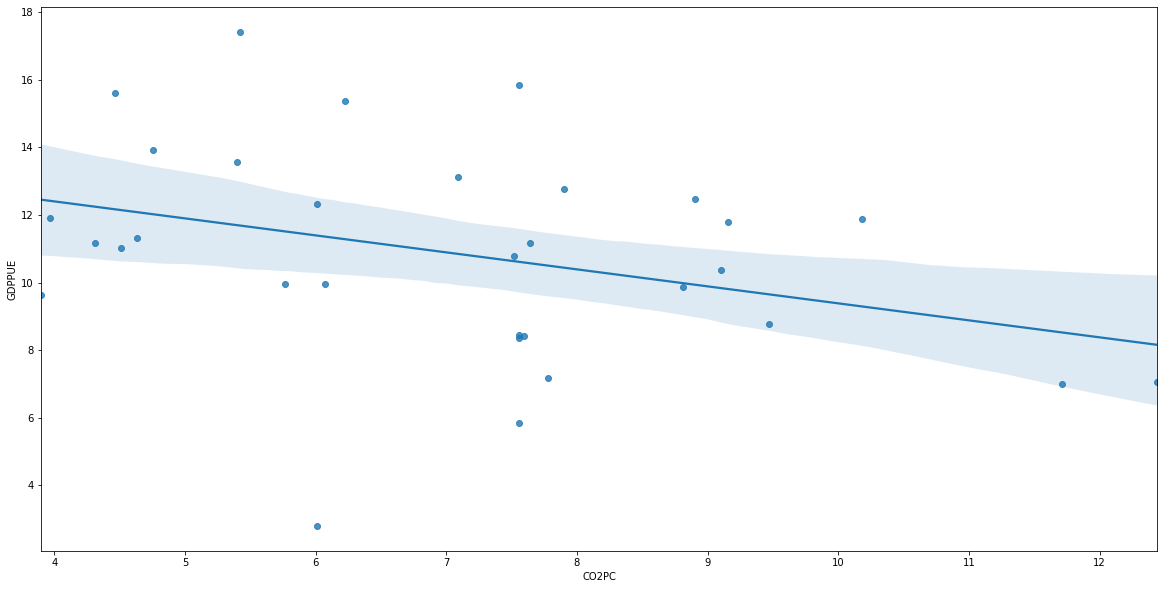

In [14]:
# Test Case of 1 Year Correlation Score
find_correlation_1_year(df2, '2015', 'GDPPUE', 'CO2PC')

0.8883


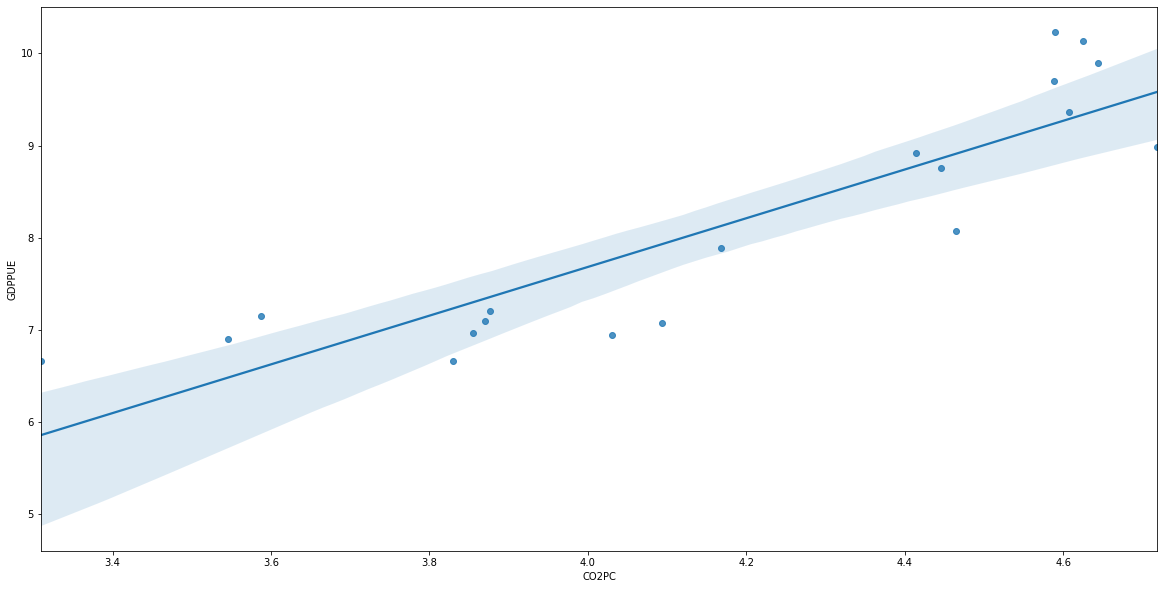

In [15]:
# Test Case of a Country
find_correlation_country_over_years(df2, 'ARG', 'GDPPUE', 'CO2PC')

In [16]:
# Function for Correlation Over Time Line Graph
def plot_corr_all_years(arr, scode1, scode2):
    plt.style.use('seaborn-whitegrid')
    plt.plot(years_arr, arr)
    plt.title(f'Correlation Over Time for {scode1} & {scode2}')
    plt.xlabel('Year')
    plt.ylabel('Correlation Coefficient')
    plt.ylim([-1, 1])
    plt.show()

In [17]:
# Function for Correlation Over Time
def find_correlation_all_years(df, scode1, scode2):
    corr_arr = []
    corr_year = []
    years = years_arr
    for i in range(23):
        df_out = single_year_comp(df, years[i], scode1, scode2)
        corr_arr.append(float(corr_coef(df_out)))
    plot_corr_all_years(corr_arr, scode1, scode2)

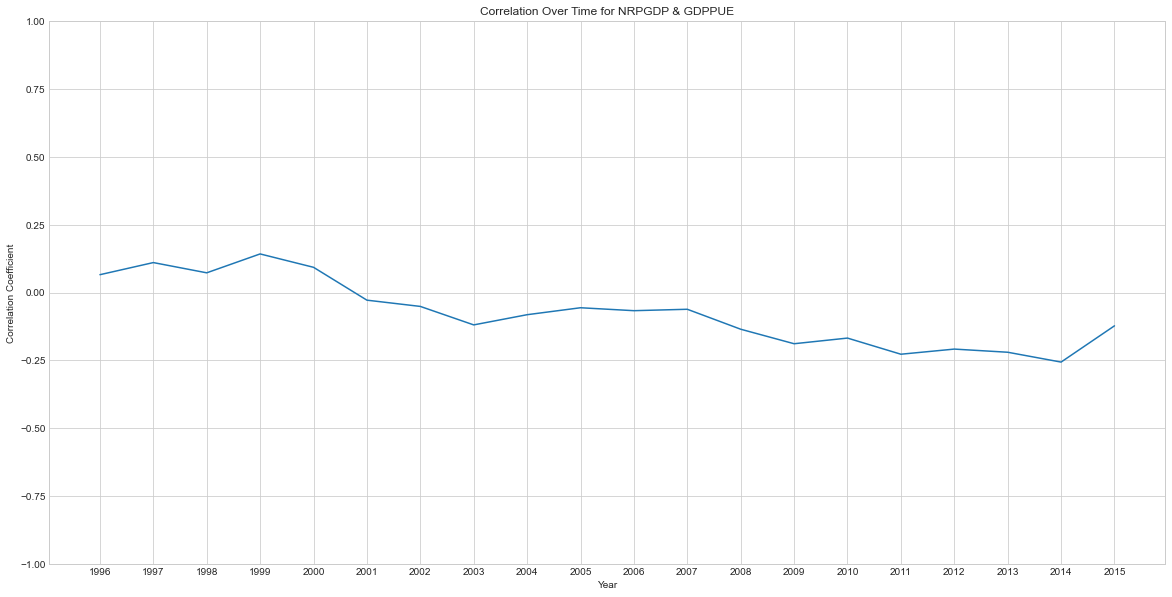

In [36]:
# All Test Cases For Correlation Over Time With Sufficient Data

# THE FOLLOWING DID NOT HAVE ENOUGH DATA TO DRAW A PROPER CONCLUSION FOR THE CORRELATION OVER TIME
# WE CANNOT ANALYZE THESE PAIRS DUE TO INSUFFICIENT DATA
#find_correlation_all_years(df2, 'EUPC', 'TPAP')
#find_correlation_all_years(df2, 'CO2T', 'TPAP')
#find_correlation_all_years(df2, 'CO2PC', 'TPAP')
#find_correlation_all_years(df2, 'GHGT', 'TPAP')
#find_correlation_all_years(df2, 'GHGT', 'CO2T')
#find_correlation_all_years(df2, 'GDPPUE', 'TPAP')
#find_correlation_all_years(df2, 'ATEP', 'TPAP')
#find_correlation_all_years(df2, 'NRPGDP', 'TPAP')


# THE FOLLOWING WERE SUBJECT TO VARIATION IN THEIR CORRELATION OVER TIME
# THESE PAIRS WILL BE ANALYZED INDIVIDUALLY ON THEIR GLOBAL IMPACT BASIS, NOT ON A COUNTRY BY COUNTRY BASIS
find_correlation_all_years(df2, 'NRPGDP', 'GDPPUE')
#find_correlation_all_years(df2, 'NRPGDP', 'ATEP')
#find_correlation_all_years(df2, 'GDPPUE', 'CO2PC')
#find_correlation_all_years(df2, 'GDPPUE', 'EUPC')
#find_correlation_all_years(df2, 'GDPPUE', 'ATEP')


# THE FOLLOWING HAVE LARGE PORTIONS OF TIME WHERE THERE IS LITTLE TO NO VARIATION IN THEIR CORRELATION OVER TIME
# THESE PAIRS WILL BE ANALYZED FOR EACH COUNTRY INDIVIDUALLY
#find_correlation_all_years(df2, 'NRPGDP', 'CO2T')
#find_correlation_all_years(df2, 'NRPGDP', 'GHGT')
#find_correlation_all_years(df2, 'GDPPUE', 'GHGT')
#find_correlation_all_years(df2, 'GDPPUE', 'CO2T')
#find_correlation_all_years(df2, 'GHGT', 'CO2PC')
#find_correlation_all_years(df2, 'GHGT', 'EUPC')
#find_correlation_all_years(df2, 'CO2PC', 'CO2T') # THIS IS PRETTY MUCH POINTLESS TO MEASURE - HAVEN'T DONE IT
#find_correlation_all_years(df2, 'CO2PC', 'ATEP')
#find_correlation_all_years(df2, 'CO2T', 'EUPC')


# THE FOLLOWING HAVE ODD SITUATIONAL GRAPHS AND MAY BE OMITTED ALTOGETHER
#find_correlation_all_years(df2, 'GHGT', 'ATEP') # Straight 1998 and Later
#find_correlation_all_years(df2, 'CO2T', 'ATEP') # Straight 1998 and Later
#find_correlation_all_years(df2, 'NRPGDP', 'EUPC') # Straight until 2015
#find_correlation_all_years(df2, 'CO2PC', 'EUPC') # Straight until 2015
#find_correlation_all_years(df2, 'NRPGDP', 'CO2PC') # Questionable if Straight
#find_correlation_all_years(df2, 'EUPC', 'ATEP') # Questionable if Straight

In [19]:
# List of Countries (THIS WAS PAINFUL AND SAD TO MAKE BECAUSE APPARENTLY I SUCK AT LOOPS)
country_arr = ['ARG','AUS','BRA','CHN','FRA','DEU','IND','IDN','ITA','JPN','KOR','MEX','NLD','RUS','SAU','ESP','CHE','TUR','GBR','USA','AFG','ALB','DZA','ASM','AND','AGO','ATG','ARM','ABW','AUT','AZE','BHS','BHR','BGD','BRB','BLR','BEL','BLZ','BEN','BMU','BTN','BOL','BIH','BWA','VGB','BRN','BGR','BFA','BDI','CPV','KHM','CMR','CAN','CYM','CAF','TCD','CHI','CHL','COL','COM','COD','COG','CRI','CIV','HRV','CUB','CUW','CYP','CZE','DNK','DJI','DMA','DOM','ECU','EGY','SLV','GNQ','ERI','EST','SWZ','ETH','FRO','FJI','FIN','PYF','GAB','GMB','GEO','GHA','GIB','GRC','GRL','GRD','GUM','GTM','GIN','GNB','GUY','HTI','HND','HKG','HUN','ISL','IRN','IRQ','IRL','IMN','ISR','JAM','JOR','KAZ','KEN','KIR','PRK','XKX','KWT','KGZ','LAO','LVA','LBN','LSO','LBR','LBY','LIE','LTU','LUX','MAC','MDG','MWI','MYS','MDV','MLI','MLT','MHL','MRT','MUS','FSM','MDA','MCO','MNG','MNE','MAR','MOZ','MMR','NAM','NRU','NPL','NCL','NZL','NIC','NER','NGA','MKD','MNP','NOR','OMN','PAK','PLW','PAN','PNG','PRY','PER','PHL','POL','PRT','PRI','QAT','ROU','RWA','WSM','SMR','STP','SEN','SRB','SYC','SLE','SGP','SXM','SVK','SVN','SLB','SOM','ZAF','SSD','LKA','KNA','LCA','MAF','VCT','SDN','SUR','SWE','SYR','TJK','TZA','THA','TLS','TGO','TON','TTO','TUN','TKM','TCA','TUV','UGA','UKR','ARE','URY','UZB','VUT','VEN','VNM','VIR','PSE','YEM','ZMB','ZWE','WLD']

In [20]:
# Function Prints All Correlations Within a Certain Range
def find_correlation_all_countries(df, scode1, scode2):
    corr_arr = []
    countries = country_arr
    for i in range(218):
        df_out = single_country_comp(df, countries[i], scode1, scode2)
        corr_arr.append(float(corr_coef(df_out)))
        x = float(corr_coef(df_out))
        if (x > 0.995) or (x < -0.995):
            print(x, countries[i])

In [21]:
find_correlation_all_countries(df2, 'CO2T', 'EUPC')

0.9978 CHN
0.9969 IND
0.998 BGD
0.9984 BRB
0.9974 MUS
0.9965 SSD
0.9964 TTO
0.9964 VNM


In [22]:
# NRPGDP versus CO2T: Greater Than 0.8000 Correlation or Less Than -0.8000 Correlation with Sufficient Data for Accuracy

# UNCOMMENT THE CHART YOU WANT TO SEE

#find_correlation_country_over_years(df2, 'AUS', 'NRPGDP', 'CO2T') # 0.9102
#find_correlation_country_over_years(df2, 'MLI', 'NRPGDP', 'CO2T') # 0.8193
#find_correlation_country_over_years(df2, 'MUS', 'NRPGDP', 'CO2T') # -0.8596
#find_correlation_country_over_years(df2, 'SLB', 'NRPGDP', 'CO2T') # 0.9139

In [23]:
# NRPGDP versus GHGT: Greater Than 0.8000 Correlation or Less Than -0.8000 Correlation with Sufficient Data for Accuracy

# UNCOMMENT THE CHART YOU WANT TO SEE

#find_correlation_country_over_years(df2, 'TUR', 'NRPGDP', 'GHGT') # 0.8332
#find_correlation_country_over_years(df2, 'BGD', 'NRPGDP', 'GHGT') # 0.9221
#find_correlation_country_over_years(df2, 'CHL', 'NRPGDP', 'GHGT') # 0.8138
#find_correlation_country_over_years(df2, 'PAK', 'NRPGDP', 'GHGT') # 0.8968
#find_correlation_country_over_years(df2, 'SLB', 'NRPGDP', 'GHGT') # 0.8061
#find_correlation_country_over_years(df2, 'UKR', 'NRPGDP', 'GHGT') # -0.8062
#find_correlation_country_over_years(df2, 'URY', 'NRPGDP', 'GHGT') # 0.8142

In [24]:
# GDPPUE versus GHGT: Greater Than 0.9500 Correlation or Less Than -0.9500 Correlation with Sufficient Data for Accuracy

# UNCOMMENT THE CHART YOU WANT TO SEE

#find_correlation_country_over_years(df2, 'BHR', 'GDPPUE', 'GHGT') # 0.9630
#find_correlation_country_over_years(df2, 'BGD', 'GDPPUE', 'GHGT') # 0.9515
#find_correlation_country_over_years(df2, 'PAK', 'GDPPUE', 'GHGT') # 0.9907 (NEAR PERFECT CORRELATION)
#find_correlation_country_over_years(df2, 'QAT', 'GDPPUE', 'GHGT') # 0.9631
#find_correlation_country_over_years(df2, 'SWE', 'GDPPUE', 'GHGT') # -0.9650

In [25]:
# GDPPUE versus CO2T: Greater Than 0.9500 Correlation or Less Than -0.9500 Correlation with Sufficient Data for Accuracy

# UNCOMMENT THE CHART YOU WANT TO SEE

#find_correlation_country_over_years(df2, 'ARG', 'GDPPUE', 'CO2T') # 0.9517
#find_correlation_country_over_years(df2, 'CHN', 'GDPPUE', 'CO2T') # 0.9562
#find_correlation_country_over_years(df2, 'AGO', 'GDPPUE', 'CO2T') # 0.9580
#find_correlation_country_over_years(df2, 'BGD', 'GDPPUE', 'CO2T') # 0.9789
#find_correlation_country_over_years(df2, 'DNK', 'GDPPUE', 'CO2T') # -0.9512
#find_correlation_country_over_years(df2, 'PAK', 'GDPPUE', 'CO2T') # 0.9892

In [26]:
# GHGT versus CO2PC: Greater Than 0.9800 Correlation with Sufficient Data for Accuracy

# UNCOMMENT THE CHART YOU WANT TO SEE

#find_correlation_country_over_years(df2, 'CHN', 'GHGT', 'CO2PC') # 0.9959 (NEAR PERFECT CORRELATION)
#find_correlation_country_over_years(df2, 'IND', 'GHGT', 'CO2PC') # 0.9863
#find_correlation_country_over_years(df2, 'BGD', 'GHGT', 'CO2PC') # 0.9831
#find_correlation_country_over_years(df2, 'DNK', 'GHGT', 'CO2PC') # 0.9860
#find_correlation_country_over_years(df2, 'GIB', 'GHGT', 'CO2PC') # 0.9871
#find_correlation_country_over_years(df2, 'MAR', 'GHGT', 'CO2PC') # 0.9856

In [27]:
# GHGT versus EUPC: Greater Than 0.9800 Correlation with Sufficient Data for Accuracy

# UNCOMMENT THE CHART YOU WANT TO SEE

#find_correlation_country_over_years(df2, 'CHN', 'GHGT', 'EUPC') # 0.9974 (NEAR PERFECT CORRELATION)
#find_correlation_country_over_years(df2, 'IND', 'GHGT', 'EUPC') # 0.9953 (NEAR PERFECT CORRELATION)
#find_correlation_country_over_years(df2, 'KOR', 'GHGT', 'EUPC') # 0.9876
#find_correlation_country_over_years(df2, 'DZA', 'GHGT', 'EUPC') # 0.9826
#find_correlation_country_over_years(df2, 'BGD', 'GHGT', 'EUPC') # 0.9842
#find_correlation_country_over_years(df2, 'GIB', 'GHGT', 'EUPC') # 0.9918
#find_correlation_country_over_years(df2, 'IRN', 'GHGT', 'EUPC') # 0.9833
#find_correlation_country_over_years(df2, 'MAR', 'GHGT', 'EUPC') # 0.9897

In [28]:
# CO2PC versus ATEP: Greater Than 0.9000 Correlation or Less Than -0.9000 Correlation with Sufficient Data for Accuracy

# UNCOMMENT THE CHART YOU WANT TO SEE

#find_correlation_country_over_years(df2, 'IND', 'CO2PC', 'ATEP') # 0.9530
#find_correlation_country_over_years(df2, 'BGD', 'CO2PC', 'ATEP') # 0.9814
#find_correlation_country_over_years(df2, 'BEN', 'CO2PC', 'ATEP') # 0.9254
#find_correlation_country_over_years(df2, 'BFA', 'CO2PC', 'ATEP') # 0.9234
#find_correlation_country_over_years(df2, 'KHM', 'CO2PC', 'ATEP') # 0.9583
#find_correlation_country_over_years(df2, 'PRK', 'CO2PC', 'ATEP') # -0.9171
#find_correlation_country_over_years(df2, 'LSO', 'CO2PC', 'ATEP') # 0.9293
#find_correlation_country_over_years(df2, 'MLI', 'CO2PC', 'ATEP') # 0.9474
#find_correlation_country_over_years(df2, 'MAR', 'CO2PC', 'ATEP') # 0.9463
#find_correlation_country_over_years(df2, 'SOM', 'CO2PC', 'ATEP') # -0.9860

In [29]:
# CO2PC versus ATEP: Greater Than 0.9950 Correlation with Sufficient Data for Accuracy

# UNCOMMENT THE CHART YOU WANT TO SEE

#find_correlation_country_over_years(df2, 'CHN', 'CO2T', 'EUPC') # 0.9978
#find_correlation_country_over_years(df2, 'IND', 'CO2T', 'EUPC') # 0.9969
#find_correlation_country_over_years(df2, 'BGD', 'CO2T', 'EUPC') # 0.9980
#find_correlation_country_over_years(df2, 'MUS', 'CO2T', 'EUPC') # 0.9974
#find_correlation_country_over_years(df2, 'TTO', 'CO2T', 'EUPC') # 0.9964
#find_correlation_country_over_years(df2, 'VNM', 'CO2T', 'EUPC') # 0.9964